In [139]:
from hazm import (
    Normalizer, word_tokenize, POSTagger,
    Chunker, tree2brackets, Lemmatizer,
    DependencyParser, Stemmer
)

In [140]:
normalizer = Normalizer()
lemmatizer = Lemmatizer()
stemmer = Stemmer()
# sentence = "من کتابم را به علی دادم."
# sentence = "سنگ شیشه را شکست."
# sentence = "علی سیب را از درخت چید."
sentence = "او یک ماشین خرید."
# sentence = "دختر به سگ غذا داد."

# normalize
normalized_sentence = normalizer.normalize(sentence)
print(normalized_sentence)


او یک ماشین خرید.


In [141]:
tokens = word_tokenize(sentence)
print(tokens)
tagger = POSTagger ( model = 'resources/postagger.model' )
tagged = tagger.tag(word_tokenize(normalized_sentence))
print(tagged)

['او', 'یک', 'ماشین', 'خرید', '.']
[('او', 'PRO'), ('یک', 'NUM'), ('ماشین', 'N'), ('خرید', 'V'), ('.', 'PUNC')]


[او NP] [یک ماشین NP] [خرید VP] .


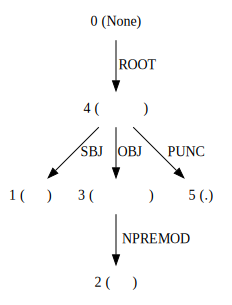

In [142]:
chunker = Chunker(model= 'resources/chunker.model')
print(tree2brackets(chunker.parse(tagged)))

parser = DependencyParser(tagger=tagger, lemmatizer=lemmatizer)
parser.parse(word_tokenize(normalized_sentence))

In [143]:
tagged = tagger.tag(word_tokenize(normalized_sentence))
print(tagged)

# Convert Active Voice to Passive Voice
# remove 'PRO' from the list of tags
tags = [item for item in tagged if item[1] != 'PRO']
print(tags)

[('او', 'PRO'), ('یک', 'NUM'), ('ماشین', 'N'), ('خرید', 'V'), ('.', 'PUNC')]
[('یک', 'NUM'), ('ماشین', 'N'), ('خرید', 'V'), ('.', 'PUNC')]


In [144]:
# purify the verb
verbs = [item[0] for item in tags if item[1] == 'V'][0]
print(verbs)
verbs = lemmatizer.lemmatize(verbs).split("#")
print(verbs)

خرید
['خرید']


In [145]:
new_sentence = ""
# get first 'N' from tags list and add it to new sentence
for item in tags:
    if item[1] == 'N':
        new_sentence += lemmatizer.lemmatize(item[0])
        # remote item from tags list
        tags.remove(item)
        break

# get 'P' from tags list and add it to new sentence
for item in tags:
    if item[1] == 'P':
        new_sentence += " " + item[0]
        # remote item from tags list
        tags.remove(item)
        break

# get second 'N' from tags list and add it to new sentence
for item in tags:
    if item[1] == 'N':
        new_sentence += " " + item[0]
        # remote item from tags list
        tags.remove(item)
        break

new_sentence = new_sentence + " " + verbs[0] + "ه" + " " + "شد."
print(new_sentence)

ماشین خریده شد.
